# Nicole Hamler 
### "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

# Geospatial Analysis using GeoPandas - Part 2

In [7]:
%matplotlib inline

from __future__ import (absolute_import, division, print_function)
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
plt.style.use('bmh')

import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
from geopandas.tools import sjoin

from shapely.geometry import Point, LineString, Polygon

In [8]:
# ROAD MAP DATASET 
rd = gpd.read_file("data\\ne_10m_roads.shp")

## (cont. from Part 1)
## 7. Coordinate reference systems 
 * GeoDataFrame or GeoSeries has the .crs attribute which holds the description of the coordinate reference system (CRS) of the geometric objects. The coordinate reference system can be converted using the _crs function. 

In [9]:
rd.crs

{'init': u'epsg:4326'}

* The current CRS of our data is based on the World Geodetic System 1984 (WGS84). EPSG (European Petroleum Survey Group) number 4326 belongs to the collection of definitions of CRS' in WGS84. This Earth-fixed reference system is based on static constants and model parameters describing the Earth's shape, gravity, size, and geomagnetic fields. (https://www.esri.com/en-us/home)

In [10]:
rd.geometry.head(3)

0    LINESTRING (-133.3253277398332 62.215709333037...
1    LINESTRING (-100.5054284631781 42.807529306798...
2    LINESTRING (-87.27431503977813 36.024391226761...
Name: geometry, dtype: object

* The output shows us that the values are describing longitude and latitude of the coordinates.

### Although EPSG 4326 is the most commonly used CRS, due to its global lat/lon references, the dataset can easily be converted to and/or from the existing crs to another:

In [11]:
# Converting from EPSG:4326 (lon/lat) to EPGS:32631 (units in meters)
rd2 = rd.to_crs(epsg=32631)

In [12]:
rd2.geometry.head(3)

0    LINESTRING (-1633559.079651064 12325250.680466...
1    LINESTRING (-5205088.850443865 11572342.912623...
2    LINESTRING (-6660108.630258108 10039815.918504...
Name: geometry, dtype: object

* Now the values in the geometric column have been converted to a different crs based on units in meters. 

## 8. Working with city based dataset

* Importing data from http://opendata.atlantaregional.com - Dataset showing Housing and Transportation Affordability (Family) in Atlanta, GA

In [13]:
# Importing the data
ATL = gpd.read_file("data\Housing_and_Transportation_Affordability_Type_8_Family.shp")

In [14]:
ATL.head(2)

,OBJECTID,GEOID10,NAME10,PLNG_REGIO,Median_hou,Type_8__An,GlobalID,last_edite,Pop_Chng_p,Tp8_HousTr,Tp8_Housin,Tp8_Transp,Tp8_Annual,geometry
0,1,13045910103,9101.03,ARC 20,57188,4.60,{BB0FBD18-1DE0-460B-8015-13BB6C9923BA},2015-06-02T14:23:55.000Z,100.3,47.42,25.10,22.32,32567,POLYGON ((-84.95479536437216 33.71964040675272...
1,2,13045910104,9101.04,ARC 20,54987,33.13,{298B4E45-3352-4590-B3D2-D7B1D1522D8F},2015-06-02T14:23:55.000Z,201.1,46.98,24.73,22.25,32394,POLYGON ((-84.94540236226057 33.72199040708714...


In [15]:
# CRS type
ATL.crs

{'init': u'epsg:4326'}

## a) Selecting different columns and/or colorschemes to depict map differently based on contained data 

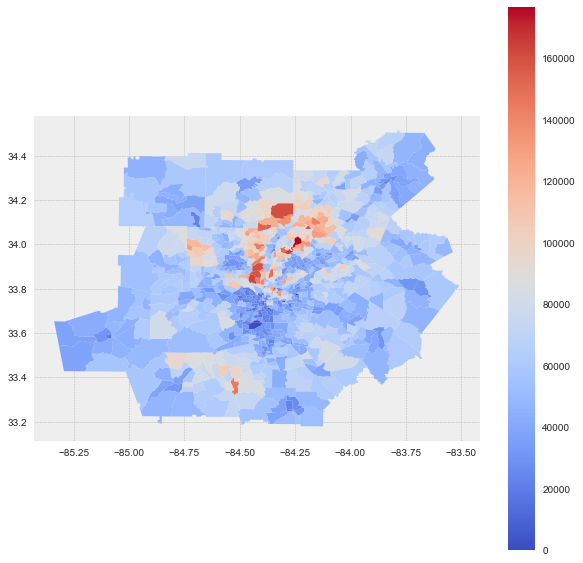

In [16]:
# Showing map with colorscheme based on column depicting: Median household income
ATL.plot(cmap = 'coolwarm', column = "Median_hou", figsize = (10,10), legend = True)

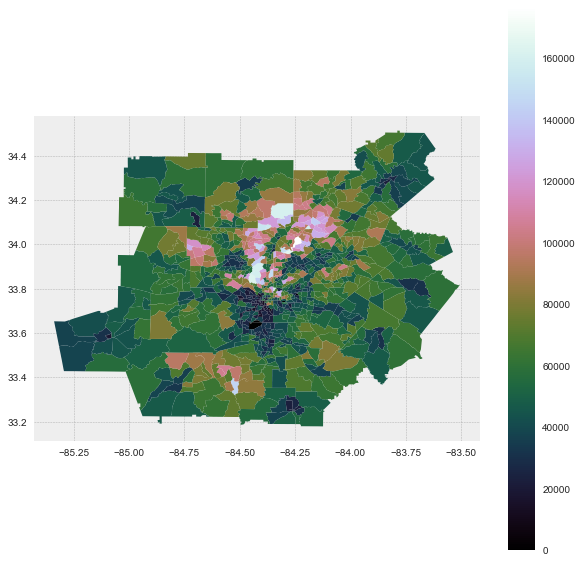

In [17]:
# Different colorschemes may emphasize data differences better: cmap = COLORSCHEME
ATL.plot(column = "Median_hou", cmap = 'cubehelix', figsize = (10,10), legend = True)

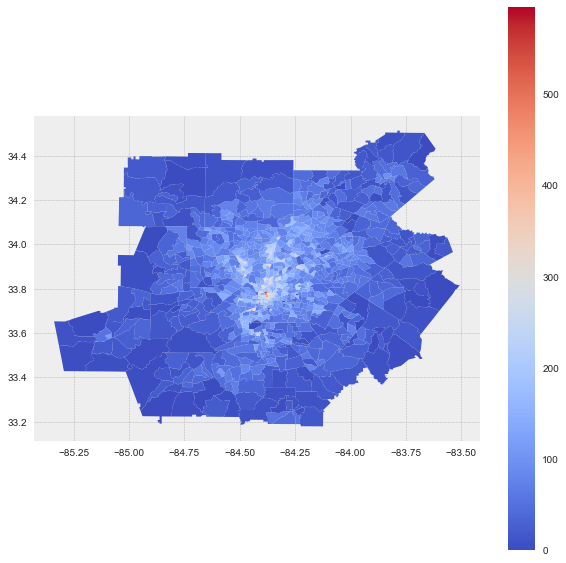

In [18]:
# Annual Transit Trips column
ATL.plot(cmap = 'coolwarm', column = "Type_8__An", figsize = (10,10), legend = True)

* Highest public transit use is within the immediate Atlanta metro.

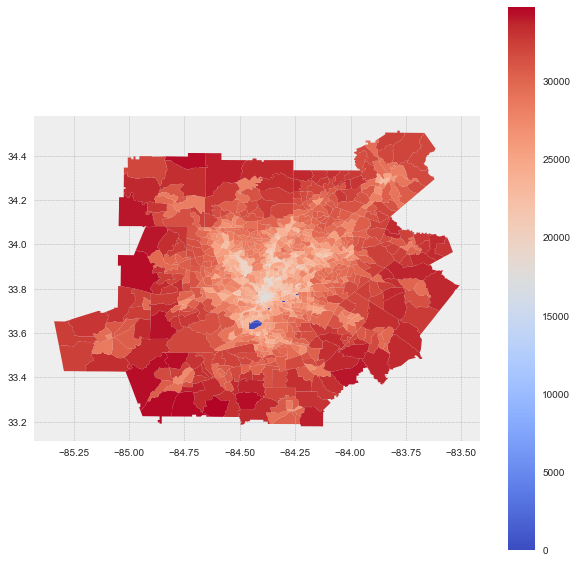

In [19]:
# Annual Vehicle miles traveled column
ATL.plot(cmap = 'coolwarm', column = "Tp8_Annual", figsize = (10,10), legend = True)

* Individuals outside of the immediate metro area tend to travel via vehicle rather than public transit.

### The same colorscheme for different columns of the dataset can aid in finding trends in the data and help with further analysis. 

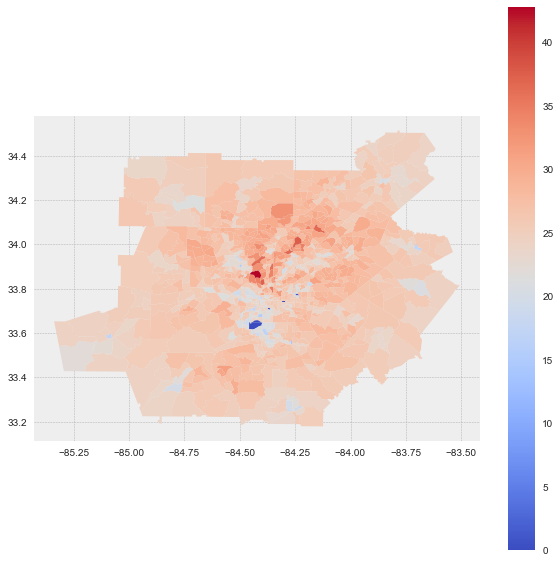

In [20]:
# Percent of housing costs of household income column 
ATL.plot(cmap = 'coolwarm', column = "Tp8_Housin", figsize = (10,10), legend = True)

In [21]:
# Showing only geometry column data contained in the dataset
ATL.geometry.head()

0    POLYGON ((-84.95479536437216 33.71964040675272...
1    POLYGON ((-84.94540236226057 33.72199040708714...
2    POLYGON ((-85.07941439313719 33.59412637518832...
3    POLYGON ((-84.90140834210276 33.57345437731921...
4    POLYGON ((-84.93233335932916 33.75177941452344...
Name: geometry, dtype: object

## b) Adding Layers
* Using the same concept as above indicating the median annual household income for the various districts and placing the road map on top. 
* Notice: in the road map plot column="COLUMN_NAME" will differentiate between different values of the column data which can then be further depicted in the legend

[(33, 34.6), (-85.35, -83.5)]

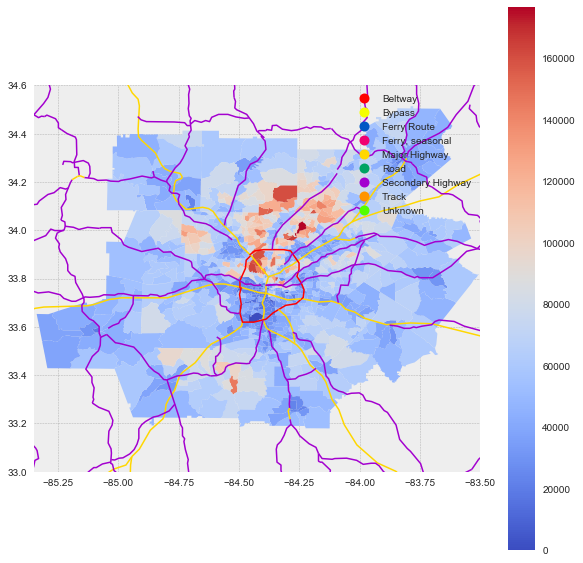

In [22]:
ax = rd.plot(linewidth = 1.5, column ="type", cmap = 'prism', figsize = (10,10), legend = True)
ATL.plot(ax=ax, column = "Median_hou", cmap = 'coolwarm', markersize = 5, legend = True)
ax.set(xlim=(-85.35,-83.5,), ylim=(33, 34.6))

* Road map overlay shows the different type of roads going through the Atlanta metro.

## 9. Converting a CSV/Excel file to GeoSeries

In [23]:
# Importing Excel file using Pandas
apd = pd.read_excel("data\\COBRADATA2016.xlsx")
apd.head(2)

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,dispo_code,MaxOfnum_victims,Shift,Avg Day,loc_type,crimes,neighborhood,npu,x,y
0,5637549,150102493,01/10/2016,01/10/2016,22:00:00,01/10/2016,22:00:00,511,NaN,NaN,...,NaN,1.0,Eve,Sun,21.0,BURGLARY-NONRES,Downtown,M,-84.39487,33.75757
1,5641270,150611492,03/01/2016,02/25/2016,12:00:00,02/29/2016,19:00:00,412,NaN,NaN,...,NaN,1.0,Unk,Unk,20.0,LARCENY-NON VEHICLE,Vine City,L,-84.41411,33.75823


* Obtained the 2016 crime dataset from http://opendata.atlantapd.org/ 
* Notice: The latitude and longitude coordinates are separated in two columns


### Convert the Pandas DataFrame (containing x and y columns instead of a single geometry column) to a GeoDataFrame with a geometry column that combines x and y columns:

In [24]:
# Appending the two columns into one geometry column
geometry = [Point(xy) for xy in zip(apd.x, apd.y)]
# Dropping the x and y columns from the dataframe
apd = apd.drop(['x', 'y','apt_office_prefix', 'apt_office_num', 'dispo_code'], axis=1)
# Initializing the lat / long coordinates as WGS84
crs = {'init': 'epsg:4326'}
# Saving the GeoDataFrame in new variable 
gdf = gpd.GeoDataFrame(apd, crs=crs, geometry=geometry)

### Adjust coordinates to show area of map that coincides with the imported dataset:

[(33.6, 33.88), (-84.56, -84.25)]

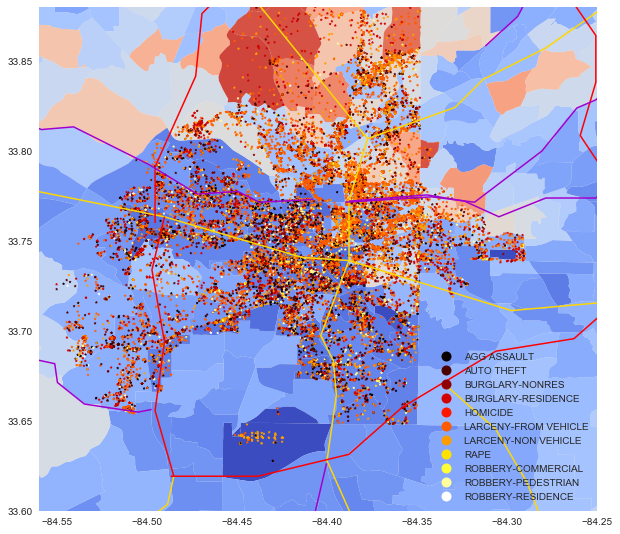

In [25]:
# Since the crime data does not encompass the Atlanta metro and surrounding areas, will 'zoom in' for a closer look:
ax = rd.plot(linewidth = 1.5, column ="type", cmap = 'prism', figsize = (10,10))
ATL.plot(ax=ax, column = "Median_hou", cmap = 'coolwarm', markersize = 5)
# Add crime dataset plot the base maps
# Notice: column = "COLUMN_NAME" will color code the different values in the specified column
gdf.plot(ax=ax, marker = "*", column = "crimes", markersize = 5, cmap='hot', legend = True)
# Adjust ax.set(xlim=(lat,lat), ylim=(lon,lon)) to the desired coordinates
ax.set(xlim=(-84.56,-84.25,), ylim=(33.6, 33.88))

### Comparison of affluent neighborhoods vs. lower income neighborhoods and the types of crimes committed:
* By adjusting the coordinates we can specify the scope of the map 

[(33.825, 33.89), (-84.465, -84.4)]

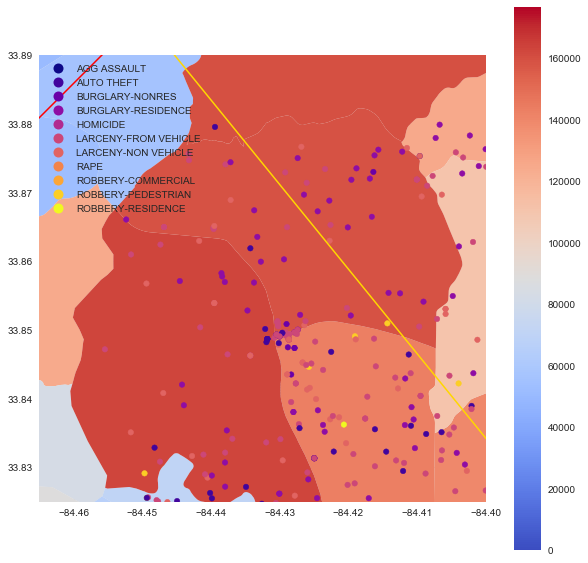

In [26]:
ax = rd.plot(linewidth = 1.5, column ="type", cmap = 'prism', figsize = (10,10))
ATL.plot(ax=ax, column = "Median_hou", cmap = 'coolwarm', markersize = 5, legend = True)
gdf.plot(ax=ax, marker = "o", column = "crimes", markersize = 30, cmap='plasma', legend = True)
# Adjust coordinates to zoom in on a specific area
ax.set(xlim=(-84.465,-84.40,), ylim=(33.825, 33.89))

* The different types of crimes are now clearly distinguishable.

[(33.74, 33.81), (-84.5, -84.425)]

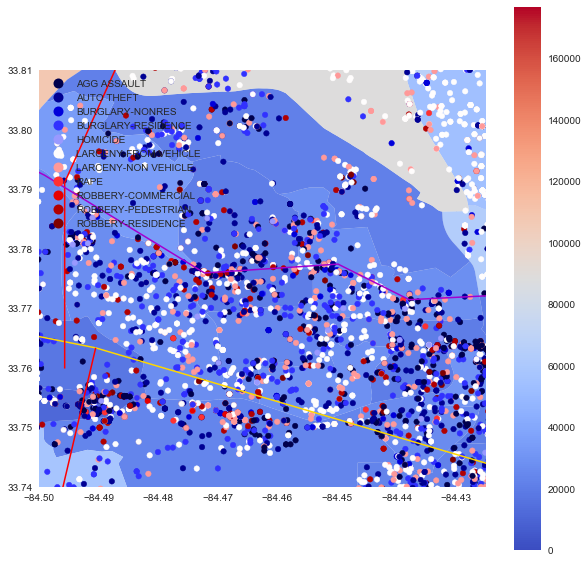

In [27]:
ax = rd.plot(linewidth = 1.5, column ="type", cmap = 'prism', figsize = (10,10))
ATL.plot(ax=ax, column = "Median_hou", cmap = 'coolwarm', markersize = 5, legend = True)
gdf.plot(ax=ax, marker = "o", column = "crimes", markersize = 30, cmap='seismic', legend = True)
ax.set(xlim=(-84.5,-84.425,), ylim=(33.74, 33.81))

* Analyzing data for different area by adjusting the coordinates.

### 10. Extracting specific information from CSV/Excel file to create layers.
* Creating three different layers for each of the violent crimes and then staggering them on top of the base map layer.

In [28]:
# Creating layer for homicides committed, this extraction of specific data from a column using GeoPandas is similar to Pandas
gdf_h = gdf.loc[gdf['crimes'] == "HOMICIDE" ]
gdf_h.head(2)

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,location,MinOfucr,MinOfibr_code,MaxOfnum_victims,Shift,Avg Day,loc_type,crimes,neighborhood,npu,geometry
29005,5696811,163660563113,12/31/2016,12/31/2016,NaN,12/31/2016,05:40:00,109,1090 HOLLYWOOD RD NW,110,0912,NaN,Morn,Sat,NaN,HOMICIDE,Almond Park,G,POINT (-84.46084999999998 33.78459)
29006,5696812,163610248112,12/26/2016,12/26/2016,03:30:00,12/26/2016,03:30:00,410,1935 ALISON CT SW,110,0911,NaN,Morn,Mon,NaN,HOMICIDE,Fort Valley,R,POINT (-84.45149000000001 33.70055)


In [29]:
gdf_r = gdf.loc[gdf['crimes'] == "RAPE" ]
gdf_r.head(2)

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,location,MinOfucr,MinOfibr_code,MaxOfnum_victims,Shift,Avg Day,loc_type,crimes,neighborhood,npu,geometry
15,5666805,160010583,01/01/2016,01/01/2016,02:30:00,01/01/2016,02:45:00,208,3380 PEACHTREE RD NE,210,1103,1.0,Morn,Fri,NaN,RAPE,North Buckhead,B,POINT (-84.36597 33.84892)
472,5667263,160071420,01/07/2016,01/07/2016,09:15:00,01/07/2016,10:45:00,104,1565 MARTIN L. KING JR. DRIVE NW @ MOZLEY PARK,210,1103,1.0,Day,Thu,31.0,RAPE,Mozley Park,K,POINT (-84.44235000000001 33.7536)


In [30]:
gdf_a = gdf.loc[gdf['crimes'] == "AGG ASSAULT" ]
gdf_a.head(2)

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,location,MinOfucr,MinOfibr_code,MaxOfnum_victims,Shift,Avg Day,loc_type,crimes,neighborhood,npu,geometry
6,5666794,153652888,01/01/2016,12/31/2015,23:05:00,01/01/2016,00:50:00,313,800 HUTCHENS RD SE @APS SOUTH ATLANTA HS,410,1314,1.0,Morn,Thu,13.0,AGG ASSAULT,South River Gardens,Z,POINT (-84.36186999999998 33.67102)
7,5666797,160010061,01/01/2016,01/01/2016,00:03:00,01/01/2016,00:09:00,403,1316 AVON AVE SW,410,1314,2.0,Morn,Fri,20.0,AGG ASSAULT,Venetian Hills,S,POINT (-84.43107000000001 33.72209)


#### Adding all three layers to the previously depicted neighborhoods of the metro area.

C:\Users\nhamler\Anaconda2\lib\site-packages\geopandas\plotting.py:389: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


[(33.825, 33.89), (-84.465, -84.4)]

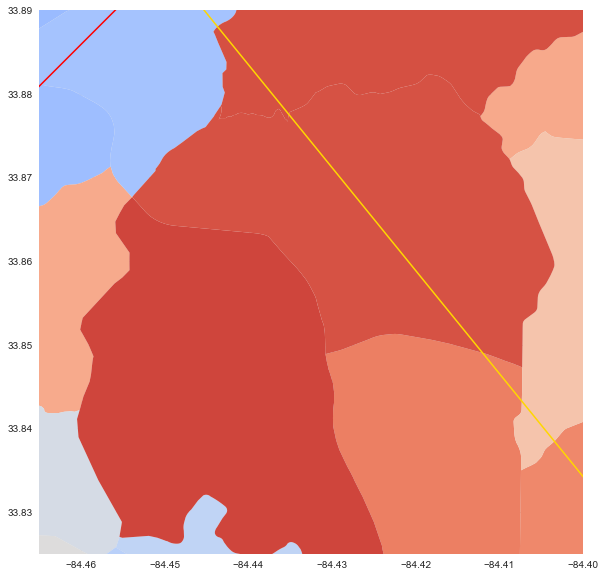

In [31]:
# Adding layers to higher income neighborhoods
ax = rd.plot(linewidth = 1.5, column ="type", cmap = 'prism', figsize = (10,10))
ATL.plot(ax=ax, column = "Median_hou", cmap = 'coolwarm', markersize = 5)
gdf_h.plot(ax=ax, marker = "o", column = "crimes", markersize = 30, color='r')
gdf_r.plot(ax=ax, marker = "o", column = "crimes", markersize = 30, color='k')
gdf_a.plot(ax=ax, marker = "o", column = "crimes", markersize = 30, color='b')
ax.set(xlim=(-84.465,-84.40,), ylim=(33.825, 33.89))

* In the more affluent neighborhood it is now evident that while there were more burglaries and property crimes, there were no violent crimes during 2016. 

[(33.74, 33.81), (-84.5, -84.425)]

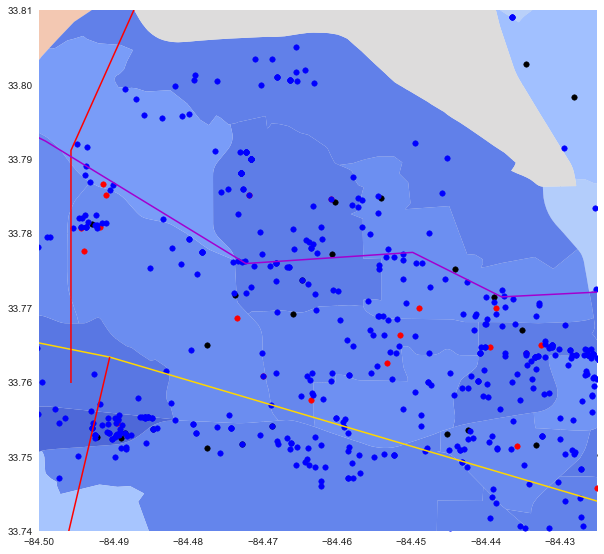

In [32]:
# Adding the same layers to the moderate income neighborhood
ax = rd.plot(linewidth = 1.5, column ="type", cmap = 'prism', figsize = (10,10))
ATL.plot(ax=ax, column = "Median_hou", cmap = 'coolwarm', markersize = 5)
gdf_h.plot(ax=ax, marker = "o", column = "crimes", markersize = 30, color='r')
gdf_r.plot(ax=ax, marker = "o", column = "crimes", markersize = 30, color='k')
gdf_a.plot(ax=ax, marker = "o", column = "crimes", markersize = 30, color='b')
ax.set(xlim=(-84.5,-84.425,), ylim=(33.74, 33.81))

* Looking at the moderate / lower income neighborhood, the difference between the two neighborhoods is clearly visible. 

###  A final look at the entire Atlanta metro area:

[(33.6, 33.88), (-84.56, -84.25)]

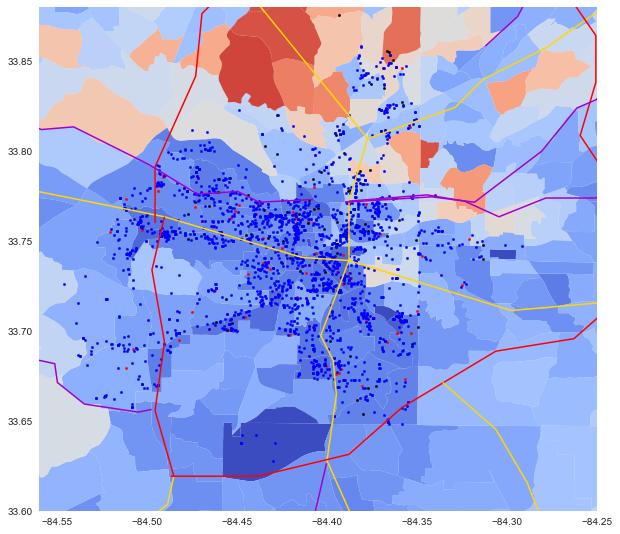

In [33]:
ax = rd.plot(linewidth = 1.5, column ="type", cmap = 'prism', figsize = (10,10))
ATL.plot(ax=ax, column = "Median_hou", cmap = 'coolwarm', markersize = 5)
gdf_h.plot(ax=ax, marker = "o", column = "crimes", markersize = 5, color='r') # Homicides - red
gdf_r.plot(ax=ax, marker = "o", column = "crimes", markersize = 5, color='k') # Rapes - black
gdf_a.plot(ax=ax, marker = "o", column = "crimes", markersize = 5, color='b') # Aggravated Assaults - blue 
ax.set(xlim=(-84.56,-84.25,), ylim=(33.6, 33.88))

* High number of aggravated assaults towards the city center are depicted in the plotted map.

## 12. Creating central points of the contained polygons in the GeoSeries 

In [34]:
# Create new variable holding the central points of the geometry column
cents = ATL.centroid

In [35]:
cents.head()

0    POINT (-84.95858032846071 33.68757095682742)
1    POINT (-84.94885753380844 33.76115226159461)
2     POINT (-85.0901192973005 33.58542884659065)
3    POINT (-84.91916589351241 33.51281168090114)
4    POINT (-84.92062018722537 33.72965547382351)
dtype: object

## Next: 13. Interactive Maps - Bokeh
### Continued in Part 3